# Prompt Engineering for Coding Tasks

## By: Vatsal Parikh


## Related Content

* Transformers: [The Transformers Architecture in Detail - What’s the magic behind LLMs?](https://aigents.co/data-science-blog/publication/the-transformers-architecture-in-detail-whats-the-magic-behind-llms)
* Tokenizer: [Unleashing the ChatGPT Tokenizer](https://medium.com/towards-data-science/chatgpt-tokenizer-chatgpt3-chatgpt4-artificial-intelligence-python-ai-27f78906ea54)
* ReAct: 
    * [ChatGPT ReAct Prompting](https://medium.com/databites/chatgpt-react-prompting-artificial-intelligence-3e34b88b5c25)
    * [ReAct: 3 LangChain Tools To Enhance the Default GPT Capabilities](https://medium.com/databites/langchain-tools-chatgpt-react-prompting-artificial-intelligence-3bd03f90d278)
* Prompt Engineering: [Prompt Engineering for Coding Tasks](https://medium.com/towards-data-science/prompt-engineering-llms-coding-chatgpt-artificial-intelligence-c16620503e4e)
* LLMs for Code Generation:
    * [Why LLMs are not Good for Coding](https://towardsdatascience.com/llms-coding-chatgpt-python-artificial-intelligence-4ea7a7bbdd93)
    *  [Why LLMs are not Good for Coding — Part II](https://towardsdatascience.com/llms-coding-software-development-artificial-intelligence-68f195bb2ad3)

In [1]:
import os
from openai import OpenAI

client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)

In [2]:
def chatgpt_call(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content

In [4]:
prompt = f"""
Can you provide me a Python code snippet to generate a dispersion chart
given two vectors?
"""

response = chatgpt_call(prompt)
print(response)

Certainly! Here is a Python code snippet using the Matplotlib library to generate a dispersion chart:

```python
import matplotlib.pyplot as plt

def dispersion_chart(vector1, vector2):
    plt.scatter(vector1, vector2)
    plt.xlabel('Vector 1')
    plt.ylabel('Vector 2')
    plt.title('Dispersion Chart')
    plt.show()

# Example usage
vector1 = [1, 2, 3, 4, 5]
vector2 = [5, 4, 3, 2, 1]
dispersion_chart(vector1, vector2)
```

You can replace the `vector1` and `vector2` lists with your own data to generate a dispersion chart based on your vectors. Let me know if you need any further assistance!


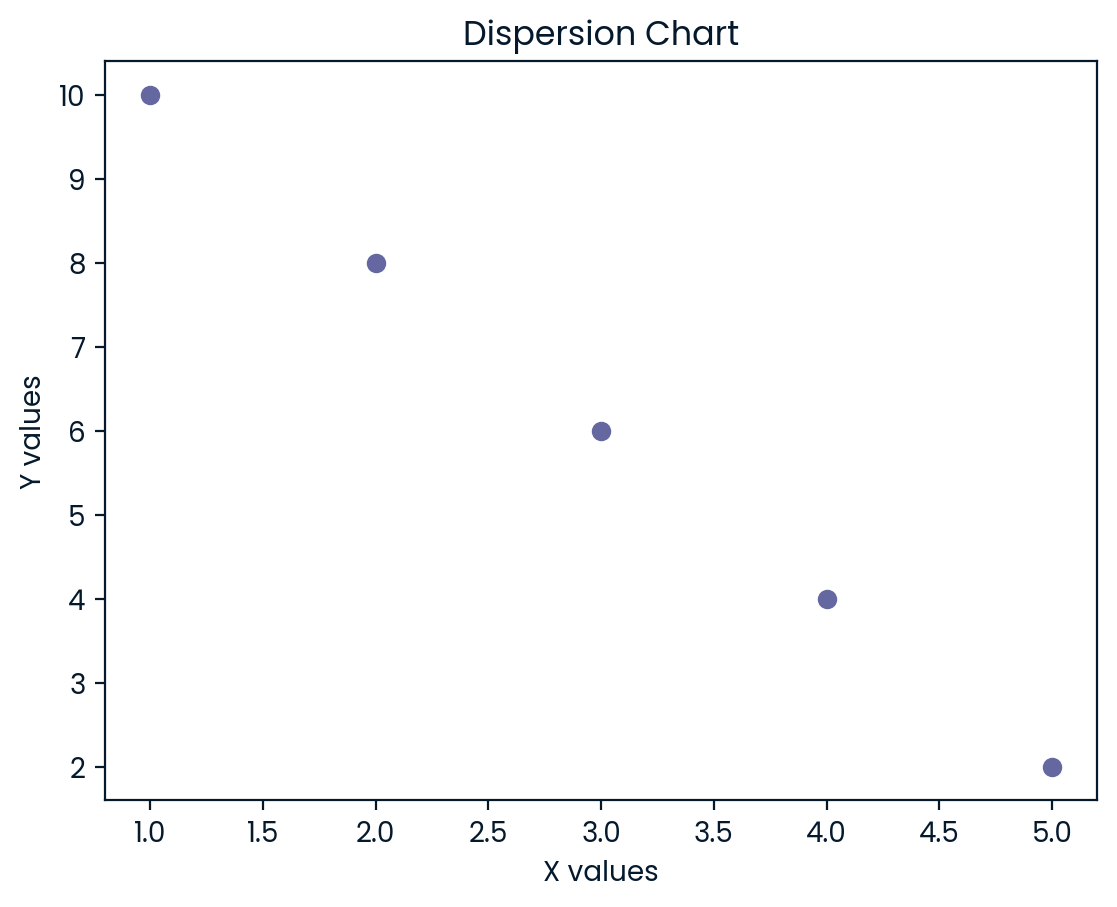

In [4]:
import matplotlib.pyplot as plt

# Two example vectors
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]

plt.scatter(x, y)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Dispersion Chart')

plt.show()

## 1. Provide the backbone of the code with code comments
Explore the weak (and noisy) pattern of natural and programming language in code, e.g code comments.

In [5]:
prompt = f"""
Can you provide me a Python code snippet to generate a dispersion chart
given two vectors?

Please use the following structure:

```python
# Install the necessary libraries
# Import the required libraries. Use plotly.
# Define the vectors
# Create the dispersion chart
# Customize the chart by adding a "Dispersion Chart in Python" as title and changing the marker style to red circles.
```
"""

In [6]:
response = chatgpt_call(prompt)
print(response)

```python
# Install the necessary libraries
# If you haven't installed the plotly library yet, you can do so using the following command:
# !pip install plotly

# Import the required libraries
import plotly.express as px
import pandas as pd

# Define the vectors
vector1 = [1, 2, 3, 4, 5]
vector2 = [5, 4, 3, 2, 1]

# Create a DataFrame using the vectors
df = pd.DataFrame({'Vector 1': vector1, 'Vector 2': vector2})

# Create the dispersion chart
fig = px.scatter(df, x='Vector 1', y='Vector 2')

# Customize the chart
fig.update_layout(title='Dispersion Chart in Python')
fig.update_traces(marker=dict(color='red', size=15, symbol='circle'))

# Show the chart
fig.show()
```


In [7]:
# Install the necessary libraries
# If you haven't installed the plotly library yet, you can do so using the following command:
# !pip install plotly

# Import the required libraries
import plotly.express as px
import pandas as pd

# Define the vectors
vector1 = [1, 2, 3, 4, 5]
vector2 = [5, 4, 3, 2, 1]

# Create a DataFrame using the vectors
df = pd.DataFrame({'Vector 1': vector1, 'Vector 2': vector2})

# Create the dispersion chart
fig = px.scatter(df, x='Vector 1', y='Vector 2')

# Customize the chart
fig.update_layout(title='Dispersion Chart in Python')
fig.update_traces(marker=dict(color='red', size=15, symbol='circle'))

# Show the chart
fig.show()

## 2. Ask for Auxiliary Tasks

Asking for auxiliary learning tasks improves the performance of the model.

![Captura de pantalla 2024-09-30 a la(s) 3.48.32 p.m.](Captura%20de%20pantalla%202024-09-30%20a%20la(s)%203.48.32%20p.m..png)


## 3. Compute Perplexity

Better prompt understanding (with lower prompt perplexity as a proxy) leads to more functionally accurate programs.

![Captura de pantalla 2024-09-30 a la(s) 3.53.40 p.m.](Captura%20de%20pantalla%202024-09-30%20a%20la(s)%203.53.40%20p.m..png)


In [8]:
import numpy as np

prompts = [
    "In a short sentence, has artifical intelligence grown in the last decade?",
    "In a short sentence, what are your thoughts on the future of artificial intelligence?",
]

def chatgpt_call_logprobs(prompt, model="gpt-3.5-turbo"):
    responses = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        n=5,
        logprobs=True # log probabilities of each output token
    )
    return responses

for prompt in prompts:
    responses = chatgpt_call_logprobs(prompt)

    logprobs = [token.logprob for token in responses.choices[0].logprobs.content]
    response_text = responses.choices[0].message.content
    response_text_tokens = [token.token for token in responses.choices[0].logprobs.content]
    max_starter_length = max(len(s) for s in ["Prompt:", "Response:", "Tokens:", "Logprobs:", "Perplexity:"])
    max_token_length = max(len(s) for s in response_text_tokens)
    

    formatted_response_tokens = [s.rjust(max_token_length) for s in response_text_tokens]
    formatted_lps = [f"{lp:.2f}".rjust(max_token_length) for lp in logprobs]

    perplexity_score = np.exp(-np.mean(logprobs))
    print("Prompt:".ljust(max_starter_length), prompt)
    print("Response:".ljust(max_starter_length), response_text, "\n")
    print("Tokens:".ljust(max_starter_length), " ".join(formatted_response_tokens))
    print("Logprobs:".ljust(max_starter_length), " ".join(formatted_lps))
    print("Perplexity:".ljust(max_starter_length), perplexity_score, "\n")

Prompt:     In a short sentence, has artifical intelligence grown in the last decade?
Response:   Yes, artificial intelligence has grown significantly in the last decade. 

Tokens:                Yes              ,     artificial   intelligence            has          grown  significantly             in            the           last         decade              .
Logprobs:            -0.00          -0.00          -0.00          -0.00          -0.00          -0.22          -0.06          -0.00          -0.00          -0.00          -0.00          -0.00
Perplexity: 1.0250072863683117 

Prompt:     In a short sentence, what are your thoughts on the future of artificial intelligence?
Response:   The future of artificial intelligence is promising but also raises ethical concerns that must be addressed. 

Tokens:               The        future            of    artificial  intelligence            is     promising           but          also        raises       ethical      concerns          t

## 4. Chain-of-Thought

* Provide a chain of relevant reasonings to follow for reaching the answer.
* Compute intermediate steps implies spending more computational effort.
* Sometimes you don’t even need to define the intermediate steps: _“Let’s think step by step”_.

![Captura de pantalla 2024-09-30 a la(s) 3.56.59 p.m.](Captura%20de%20pantalla%202024-09-30%20a%20la(s)%203.56.59%20p.m..png)

* For code generation, Chain-of-Thought works better when including sequence, branch, and loop structures present in code.

![Captura de pantalla 2024-09-30 a la(s) 4.43.10 p.m.](Captura%20de%20pantalla%202024-09-30%20a%20la(s)%204.43.10%20p.m..png)

[[source]]([url](https://arxiv.org/pdf/2305.06599))


In [9]:
prompt = f"""
Write a function to find sequences of lowercase letters joined with an underscore.
"""

In [10]:
response = chatgpt_call(prompt)
print(response)

Here is a Python function that finds sequences of lowercase letters joined with an underscore in a given input string:

```python
import re

def find_sequences(input_string):
    pattern = r'[a-z]+_[a-z]+'
    sequences = re.findall(pattern, input_string)
    return sequences

# Example
input_string = "hello_world is a_python_program"
print(find_sequences(input_string))
```

You can use this function by passing a string as input and it will return a list of sequences of lowercase letters joined with an underscore found in the input string.


In [11]:
prompt = f"""
Write a function to find sequences of lowercase letters joined with an underscore.

def text_lowercase_underscore(text): ```
    Input: text: str
    Output: seq: list of str
    1: Initialize seq as an empty list
    2: for each word in text split by space do
    3: if word matches the pattern of lowercase letters joined with an underscore then
    4: append the word to seq
    5: return seq
```
"""

In [12]:
response = chatgpt_call(prompt)
print(response)

def text_lowercase_underscore(text):
    import re
    
    seq = []
    pattern = re.compile(r'\b[a-z]+_[a-z]+\b')
    
    for word in text.split():
        if pattern.match(word):
            seq.append(word)
    
    return seq


## 5. Self-Consistency

Instead of relying on a single generated answer, Self-Consistency generates multiple outputs and selects the most common or best output based on majority voting. This enhances reliability and reduces errors.

In [13]:
prompt = f"""
Let's solve the problem of calculating the factorial of a number by generating multiple possible solutions and selecting the most consistent approach.
"""

In [14]:
response = chatgpt_call(prompt)
print(response)

Here are three possible solutions to calculate the factorial of a number:

1. Using a recursive function:
```python
def factorial_recursive(n):
    if n == 0:
        return 1
    else:
        return n * factorial_recursive(n-1)
```

2. Using a loop:
```python
def factorial_iterative(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result
```

3. Using the math library:
```python
import math

def factorial_math(n):
    return math.factorial(n)
```

To select the most consistent approach, we can consider factors such as efficiency, readability, and ease of implementation. 

1. The recursive function is a simple and elegant solution but may not be the most efficient for large values of n due to potential stack overflow issues.
2. The iterative loop solution is more efficient in terms of space complexity compared to the recursive solution and is easier to read and implement.
3. Using the math library function is the most concise and straightforward solution, 

_Wait... is this really self-consistency?_

In [15]:
def chatgpt_call(prompt, model="gpt-3.5-turbo"):
    responses = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        n=5
    )
    return responses

In [16]:
prompt = f"""
    Provide a Python code snippet to compute the factorial of a number in an efficient way. Provide the result of the factorial of 5.
"""

responses = chatgpt_call(prompt)
for response in responses.choices:
    print("-------------------------------------")
    print(response.message.content)

-------------------------------------
```python
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

# Calculate factorial of 5
result = factorial(5)
print(result)
```

Output:
```
120
```
-------------------------------------
Here is a Python code snippet to compute the factorial of a number in an efficient way using recursion:

```python
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n-1)

result = factorial(5)
print(result)
```

Result of the factorial of 5 is:

```
120
```
-------------------------------------
Here is a Python code snippet to compute the factorial of a number in an efficient way using recursion:

```python
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n-1)

result = factorial(5)
print(result)
```

The result of the factorial of 5 is:
```
120
```
-------------------------------------
Here is the Python code snippet to compute the factorial of a number in an effici

Self-consistency also presents other approaches:

![Captura de pantalla 2024-09-30 a la(s) 4.28.20 p.m.](Captura%20de%20pantalla%202024-09-30%20a%20la(s)%204.28.20%20p.m..png)

[[source]]([url](https://arxiv.org/pdf/2310.14053))


## 6. ReAct

ReAct combines reasoning and action-based feedback. The model alternates between reasoning steps and interacting with an external environment (e.g., running code) to validate and refine its solution iteratively.

LangChain contains tools to be used as Code Interpreters:

![Captura de pantalla 2024-09-30 a la(s) 5.28.57 p.m.](Captura%20de%20pantalla%202024-09-30%20a%20la(s)%205.28.57%20p.m..png)



## 7. Iterative Decoding

Iterative decoding, where the model can be used to refine its output or hierarchical models.

![Captura de pantalla 2024-09-30 a la(s) 5.18.47 p.m.](Captura%20de%20pantalla%202024-09-30%20a%20la(s)%205.18.47%20p.m..png)


## A.1 Security and Authorship
* AI-generated code may inadvertently introduce security vulnerabilities, such as SQL injection, cross-site scripting (XSS), or buffer overflow exploits, especially if the model is trained on unvetted data. In addition, AI models might generate code that mishandles sensitive information, such as user data or authentication tokens, leading to breaches or privacy violations.

* Legal ownership of AI-generated code is a gray area. It’s unclear if the AI creator, the user who prompted the generation, or both have ownership rights. In addition, if AI models are trained on copyrighted code or data, there may be concerns about violating IP rights if generated code is too similar to its training data.

## A.2 Emergence of Code Models

![Captura de pantalla 2024-09-30 a la(s) 5.17.30 p.m.](Captura%20de%20pantalla%202024-09-30%20a%20la(s)%205.17.30%20p.m..png)

[[source]]([url](https://arxiv.org/pdf/2406.00515))